#  2-D Linear Convection

The PDE governing 2-D Linear Convection is written as

## $$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} + c \frac{\partial u}{\partial y} = 0 $$

With that in mind, our discretization of the PDE should be relatively straightforward.  

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c\frac{u_{i, j}^n-u_{i-1,j}^n}{\Delta x} + c\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0$$

As before, solve for the only unknown:

$$u_{i,j}^{n+1} = u_{i,j}^n-c \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-c \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)$$

We will solve this equation with the following initial conditions:

$$u(x,y) = \begin{cases}
\begin{matrix}
2\ \text{for} & 0.5 \leq x, y \leq 1 \cr
1\ \text{for} & \text{everywhere else}\end{matrix}\end{cases}$$

and boundary conditions:

$$u = 1\ \text{for } \begin{cases}
\begin{matrix}
x =  0,\ 2 \cr
y =  0,\ 2 \end{matrix}\end{cases}$$

In [59]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

In [75]:
# first define grids/grid size and time/timestep 

nx = 51      # no of grids in x-direction
ny = nx      # no of grids in y-direction

dx = 2 / (nx-1) 
dy = 2 / (ny-1) 

C = 1        # Eq. constant

nt = 100     # total time
Courant_no = 0.2  # CFL Criteria
dt = Courant_no * dx/C

# Creating a domain

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

# Storing values for initial 'u' and calculated for new time step 'un'

u = np.ones([nx,ny])
un = np.ones([nx,ny])


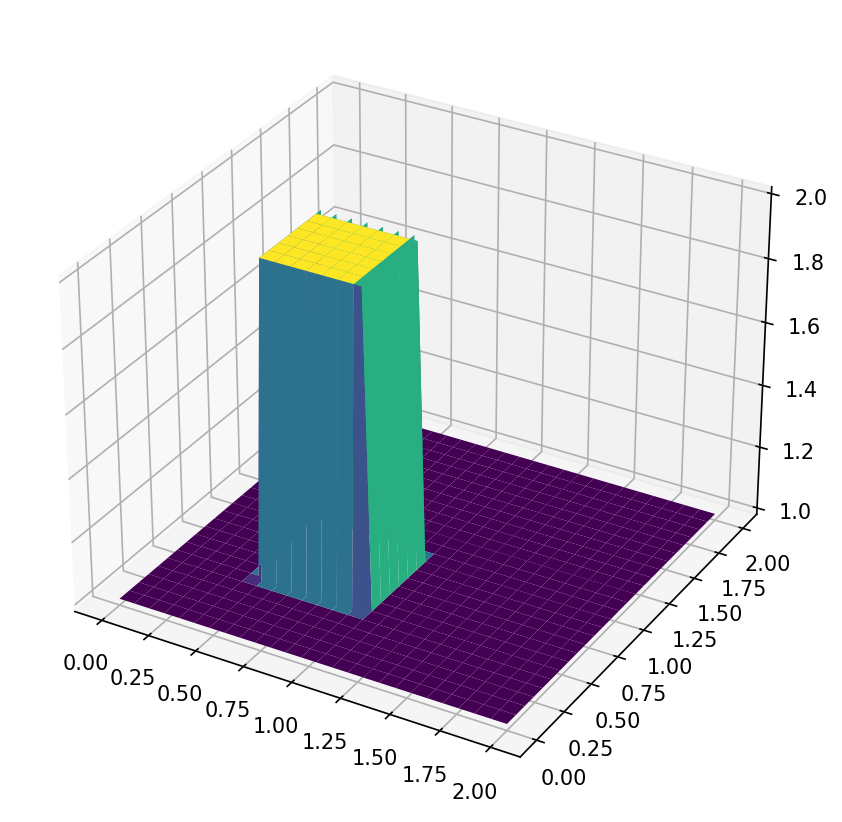

In [76]:
# initail and boundary conditions
u[int(0.5/dx):int(1/dx+1 ),int(0.5/dy):int(1/dy+1 )] = 2

# plot inital condition
fig = pyplot.figure(figsize=(11,7),dpi=150)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x,y)

surf = ax.plot_surface(X, Y, u[:], cmap = cm.viridis)

## Iterating in 2-D


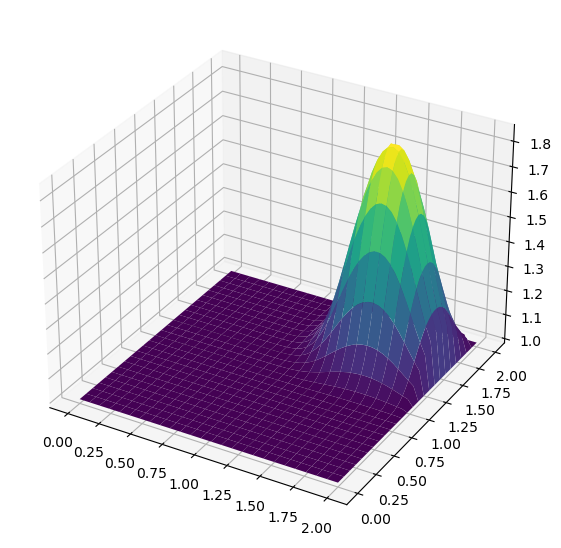

In [77]:
u = np.ones((ny, nx))
u[int(.5 / dx):int(1 / dx + 1), int(.5 / dy):int(1 / dy + 1)] = 2


for n in range(nt+1): ## Loop for time-steps
    un = u.copy()
    row,col = u.shape
    
    for j in range(1,row):
        for i in range(1,col):
            u[j,i] = un[j,i] - ((C * dt/dx)*(un[j,i] - un[j,i-1])) - ((C * dt/dx)*(un[j,i] - un[j-1,i]))
                                
            u[0,:] = 1
            u[-1,:] = 1
            u[:,0] = 1
            u[:,-1] = 1
            
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)